In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings ('ignore')

# 

# 

# 1) Importing Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv")

In [3]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


# 

# 

# 

# 2) Data Selection

## Columns

### Checking Columns & Rows

In [4]:
df.shape

(31647, 18)

### Checking all Columns

In [5]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

### Checking all values of a Column

In [6]:
df["subscribed"].unique()

array(['no', 'yes'], dtype=object)

In [7]:
df["housing"].unique()

array(['no', 'yes'], dtype=object)

In [8]:
df["job"].unique()

array(['admin.', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed'], dtype=object)

### Find the maximum value in a column

In [9]:
max(df["age"])

95

### Find Rows having maximum values in a column

In [10]:
max_ = df[df.age == max(df["age"])] 
max_

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
12870,33700,95,retired,divorced,primary,no,2282,no,no,telephone,21,apr,207,17,-1,0,unknown,yes


In [11]:
max_.shape

(1, 18)

### Removing Unnecessary column

In [12]:
df.drop(['ID'], axis=1,inplace=True)

In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


### Removing Duplicate Values

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(31647, 17)

In [16]:
df.drop_duplicates(inplace=True)
df.shape

(31647, 17)

### Checking Unique Values in Columns

In [17]:
df.nunique()

age             76
job             12
marital          3
education        4
default          2
balance       6326
housing          2
loan             2
contact          3
day             31
month           12
duration      1454
campaign        45
pdays          509
previous        38
poutcome         4
subscribed       2
dtype: int64

### 

## Replacing Categorical Values

### Encoding

In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [19]:
df.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
df.job = le.fit_transform(df.job)
df.marital = le.fit_transform(df.marital)
df.education = le.fit_transform(df.education)
df.default = le.fit_transform(df.default)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.contact = le.fit_transform(df.contact)
df.month = le.fit_transform(df.month)
df.poutcome = le.fit_transform(df.poutcome)
df.subscribed = le.fit_transform(df.subscribed)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


### 

## Analysing Null Values

#### Finding Null Values

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         31647 non-null  int64
 1   job         31647 non-null  int32
 2   marital     31647 non-null  int32
 3   education   31647 non-null  int32
 4   default     31647 non-null  int32
 5   balance     31647 non-null  int64
 6   housing     31647 non-null  int32
 7   loan        31647 non-null  int32
 8   contact     31647 non-null  int32
 9   day         31647 non-null  int64
 10  month       31647 non-null  int32
 11  duration    31647 non-null  int64
 12  campaign    31647 non-null  int64
 13  pdays       31647 non-null  int64
 14  previous    31647 non-null  int64
 15  poutcome    31647 non-null  int32
 16  subscribed  31647 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 3.1 MB


In [23]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of          age    job  marital  education  default  balance  housing   loan  \
0      False  False    False      False    False    False    False  False   
1      False  False    False      False    False    False    False  False   
2      False  False    False      False    False    False    False  False   
3      False  False    False      False    False    False    False  False   
4      False  False    False      False    False    False    False  False   
...      ...    ...      ...        ...      ...      ...      ...    ...   
31642  False  False    False      False    False    False    False  False   
31643  False  False    False      False    False    False    False  False   
31644  False  False    False      False    False    False    False  False   
31645  False  False    False      False    False    False    False  False   
31646  False  False    False      False    False    False    False  False   

       contac

In [24]:
df.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [25]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

#### Checking Not Null Values

In [26]:
df.notnull().sum()

age           31647
job           31647
marital       31647
education     31647
default       31647
balance       31647
housing       31647
loan          31647
contact       31647
day           31647
month         31647
duration      31647
campaign      31647
pdays         31647
previous      31647
poutcome      31647
subscribed    31647
dtype: int64

### 

### 

### 

# 3) Analysing Data Description

### Describe

In [27]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


# 

### Correlation Checking

In [28]:
corr = df.corr()
corr

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
housing,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
loan,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051
day,-0.011056,0.020951,-0.007686,0.017902,0.009996,0.003461,-0.025666,0.014769,-0.027046,1.000000,-0.000604,-0.032288,0.159168,-0.087626,-0.048752,0.077586,-0.029600


# 

### VIF

In [29]:
x = df.drop(columns = ['subscribed'])
y = df['subscribed']

vif = pd.DataFrame()

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif["VIF"] = [variance_inflation_factor (x.values, i) for i in range(x.shape[1])]
vif["variables"] = x.columns
vif

,VIF,variables
0,12.567890,age
1,2.834285,job
2,4.722944,marital
3,3.738969,education
4,1.031668,default
5,1.244102,balance
6,2.550334,housing
7,1.210205,loan
8,1.990961,contact
9,4.592540,day


# 

### Contribution Score

In [30]:
from sklearn.feature_selection import SelectKBest, f_classif

In [31]:
x = df.drop(columns = ['subscribed'])
y = df['subscribed']

In [32]:
best_features = SelectKBest(score_func=f_classif, k=7)

fit = best_features.fit(x,y)

df_scores = pd.DataFrame(fit.scores_) 
df_columns = pd.DataFrame(x.columns) 

feature_scores = pd.concat([df_columns, df_scores], axis=1)

feature_scores.columns = ['Feature_Name', 'Score']
print(feature_scores.nlargest(7, 'Score'))

   Feature_Name        Score
11     duration  5671.062516
8       contact   728.909409
6       housing   642.748084
13        pdays   375.492162
14     previous   247.430356
15     poutcome   208.446461
7          loan   166.127429


### 

### 

### 

# 4) Visual Representation

## Checking Skewness

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

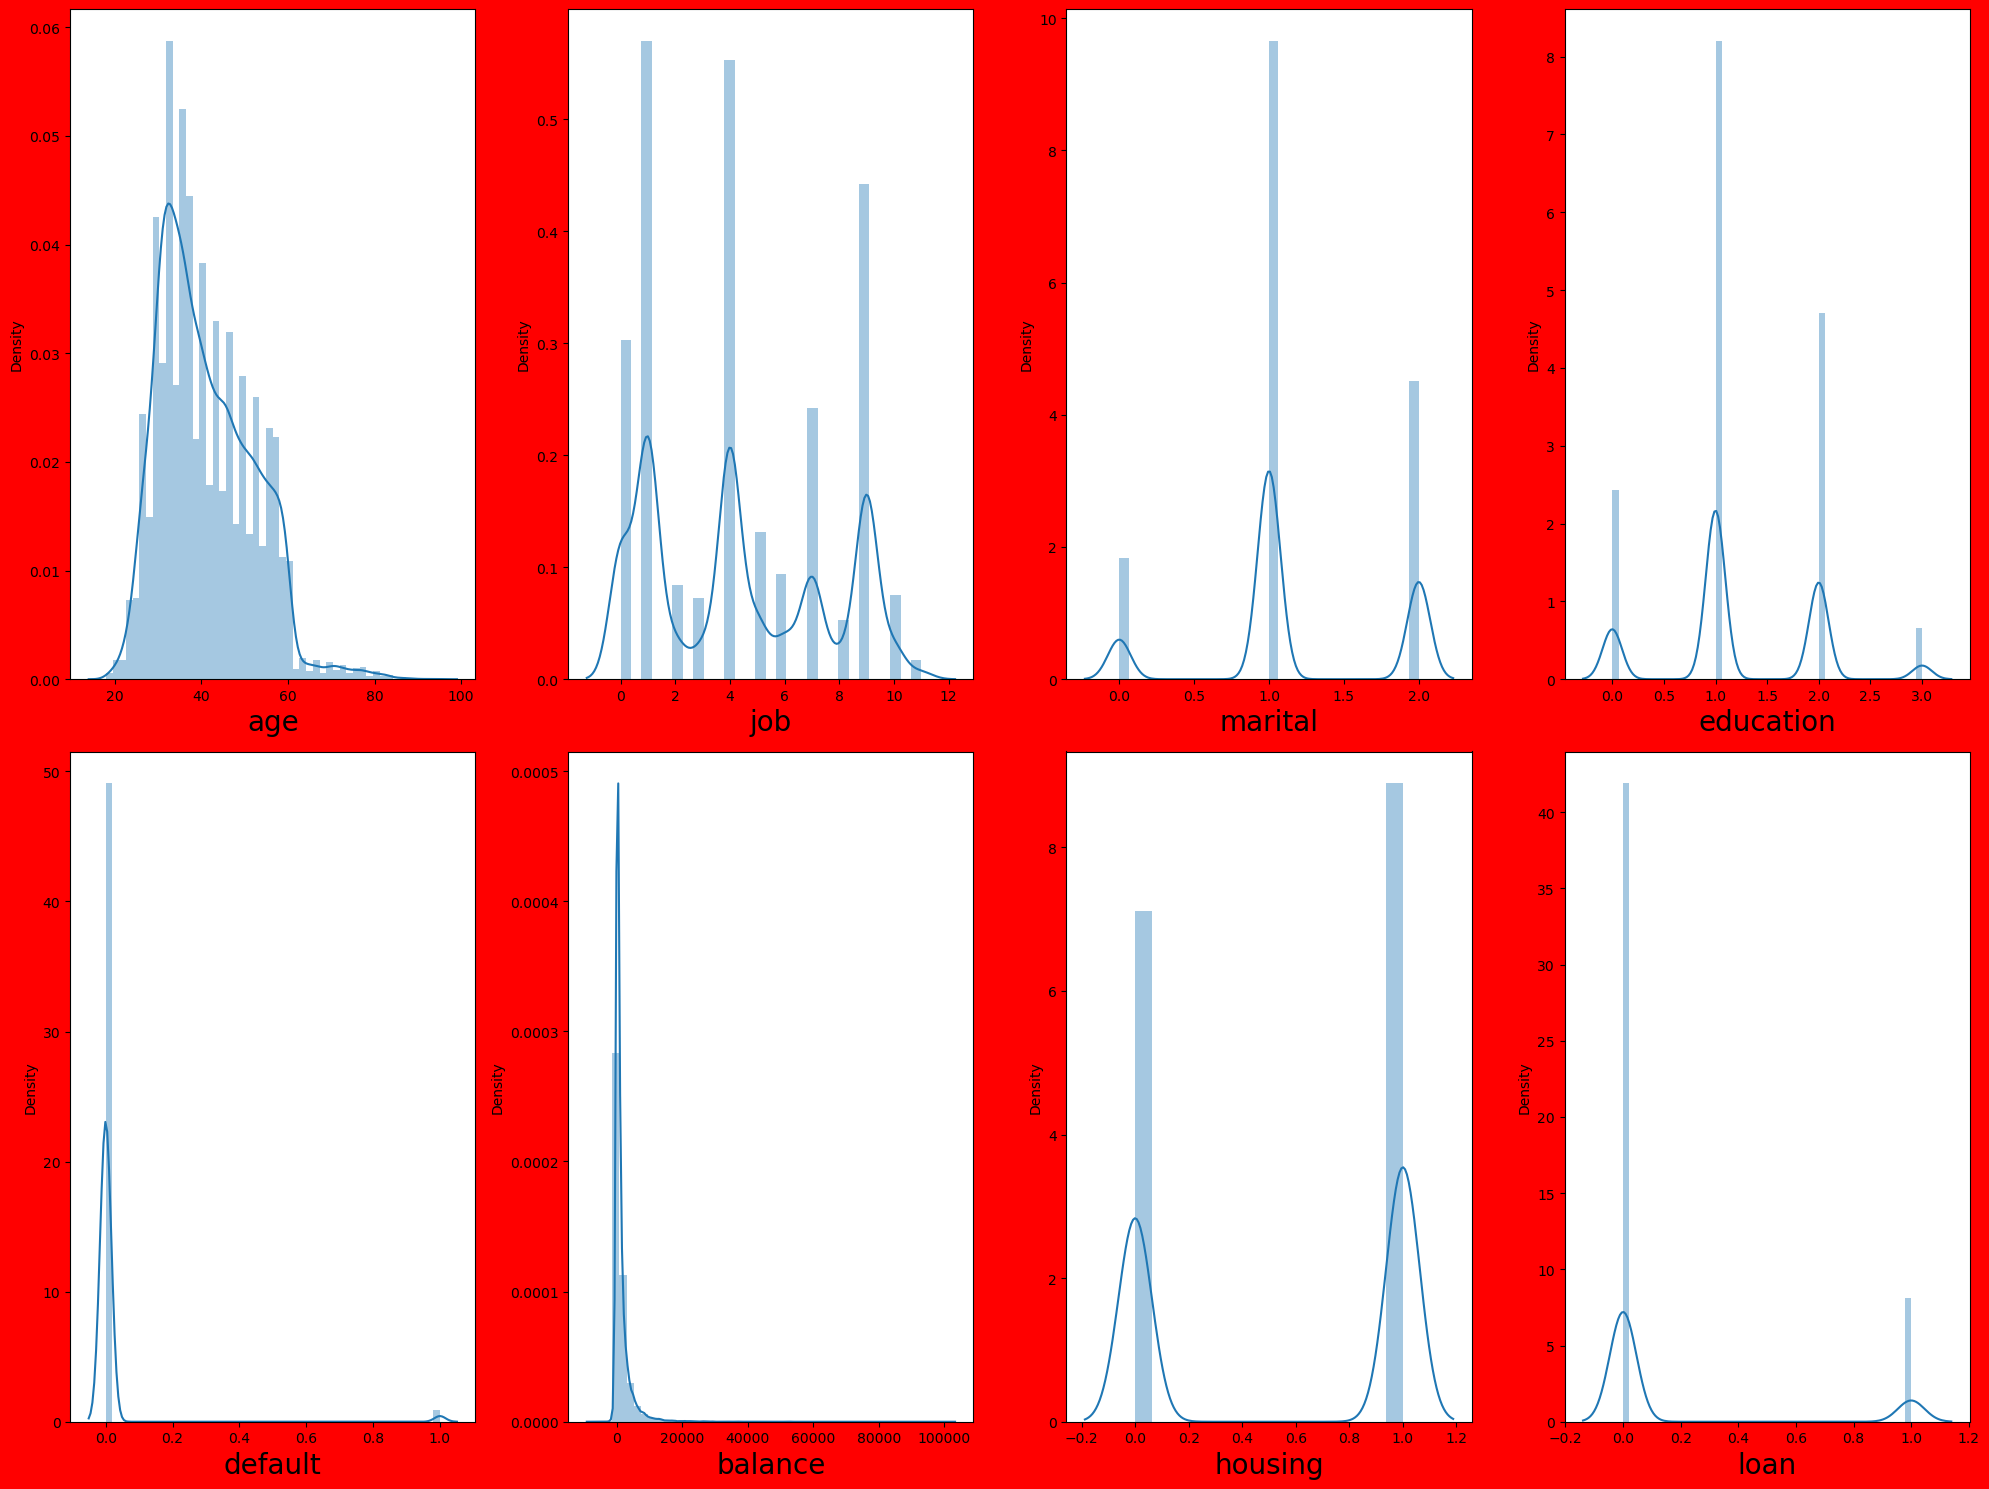

In [34]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in df:                       
    if plotnumber<=8:                    
        ax = plt.subplot(2,4,plotnumber)    
        sns.distplot(df[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

# 

## Checking Outliners

In [35]:
df_features = df.drop('subscribed',axis=1)

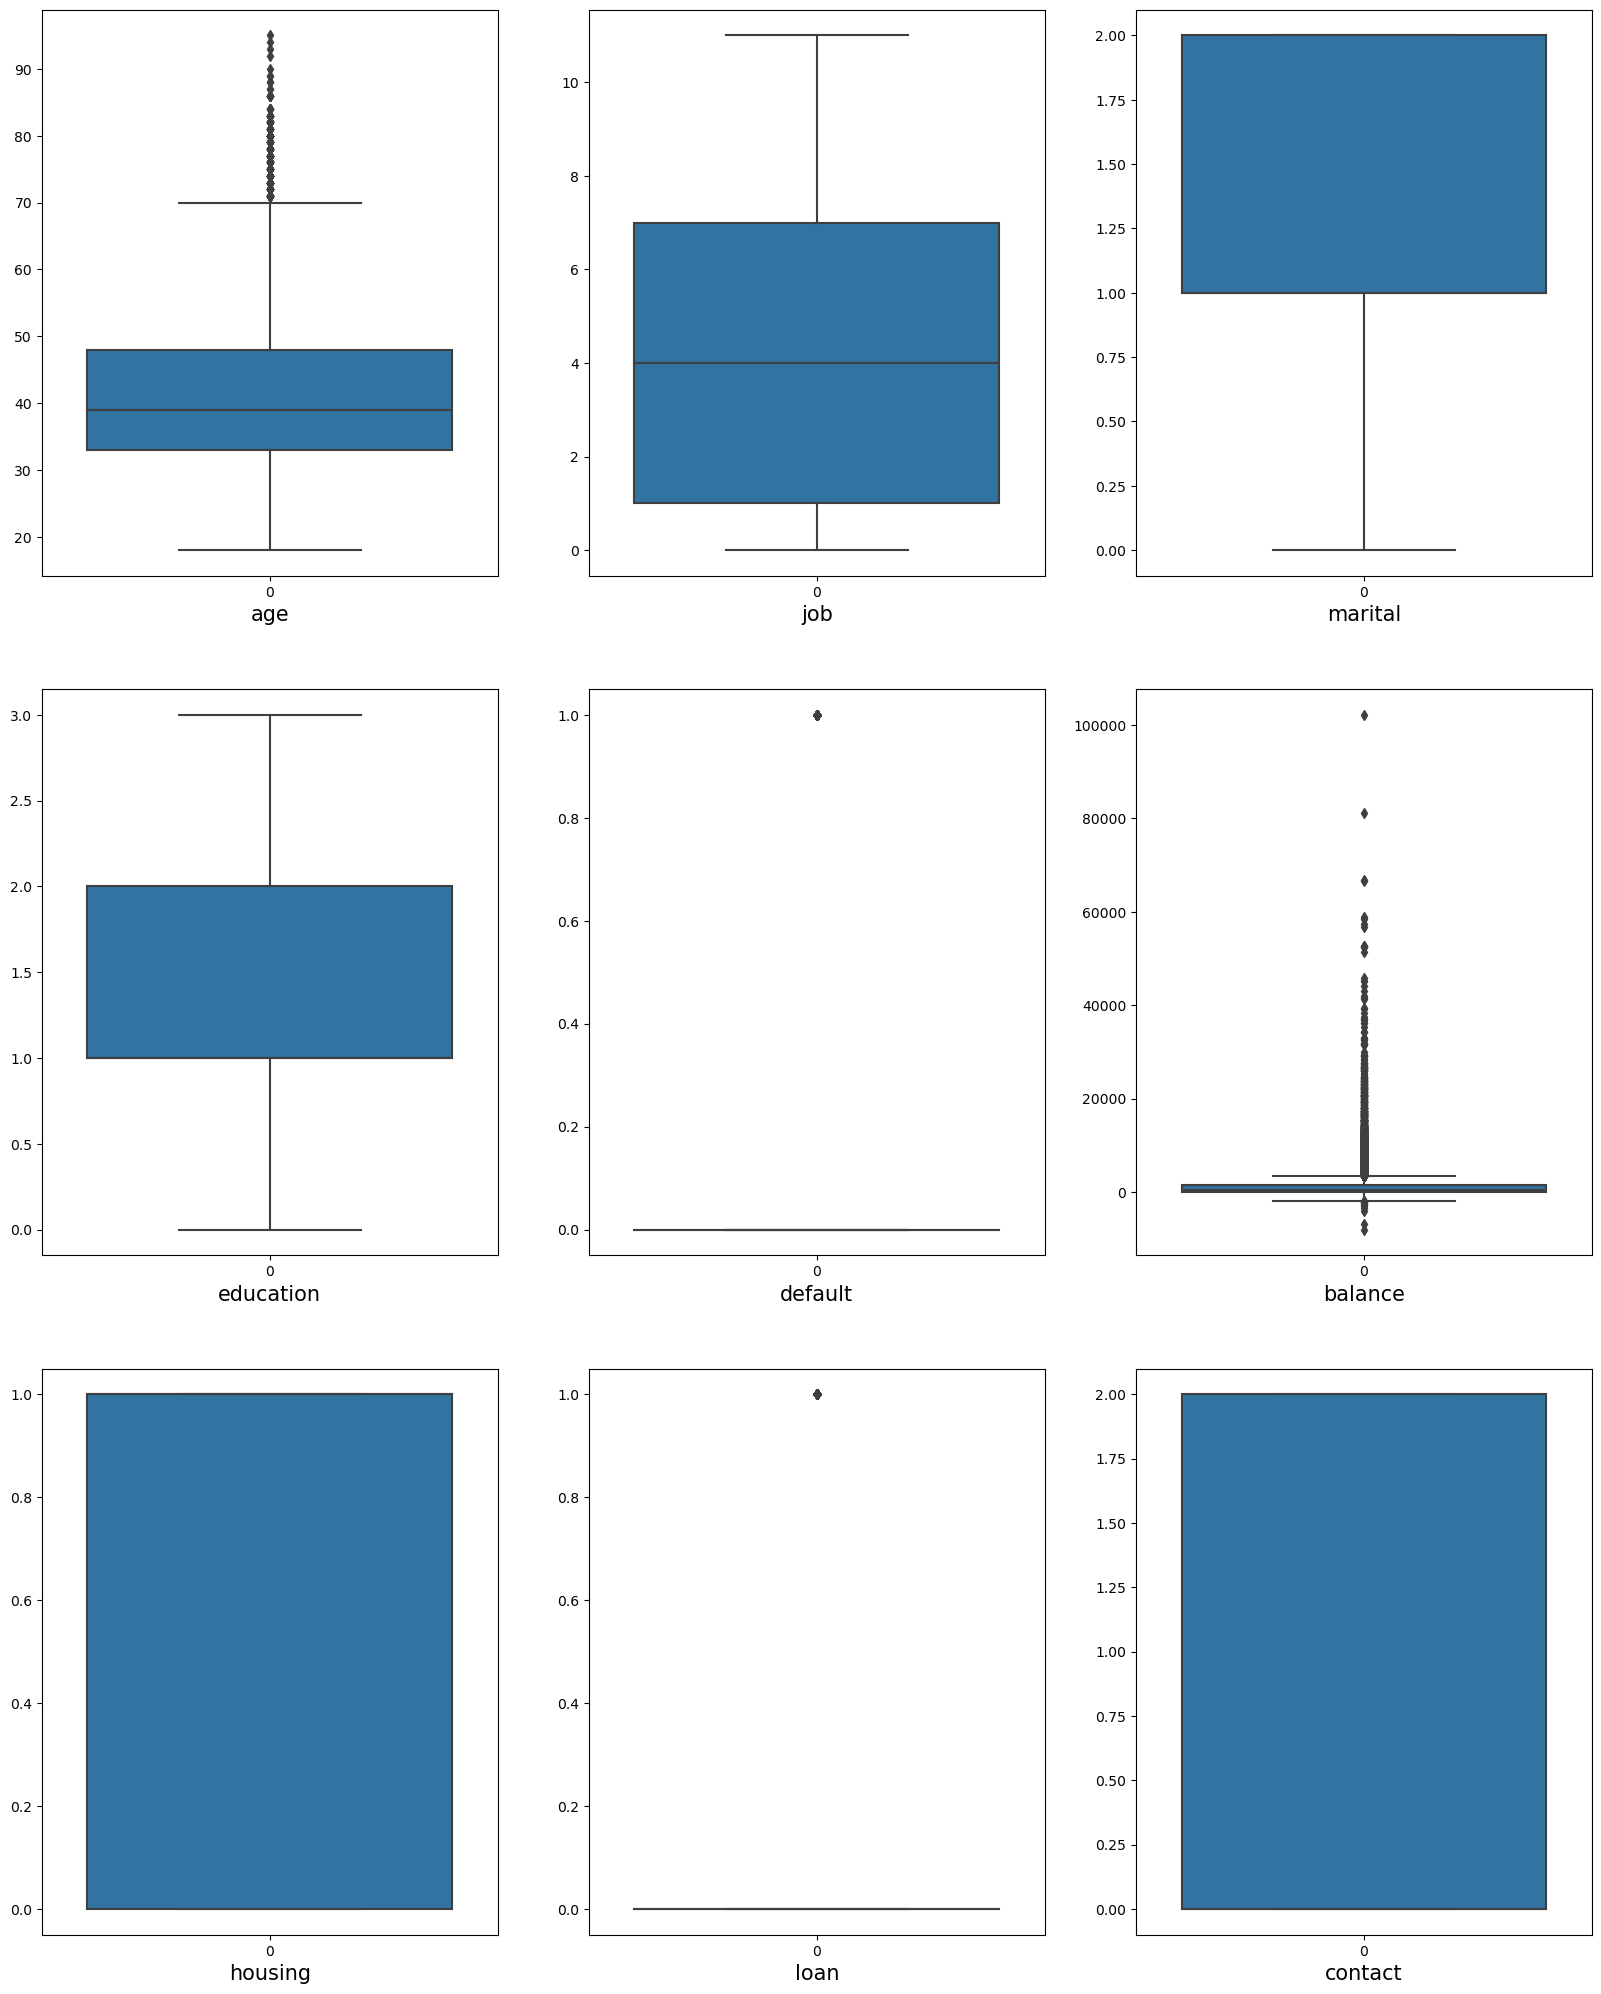

In [36]:
plt.figure(figsize=(20,25))
graph = 1

for column in df_features: 
    if graph<=9:
        plt.subplot(3,3, graph)
        ax=sns.boxplot(data= df_features [column])   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

# 

## Data Distribution

In [37]:
x = df.drop(columns = ['subscribed'])
y = df['subscribed']

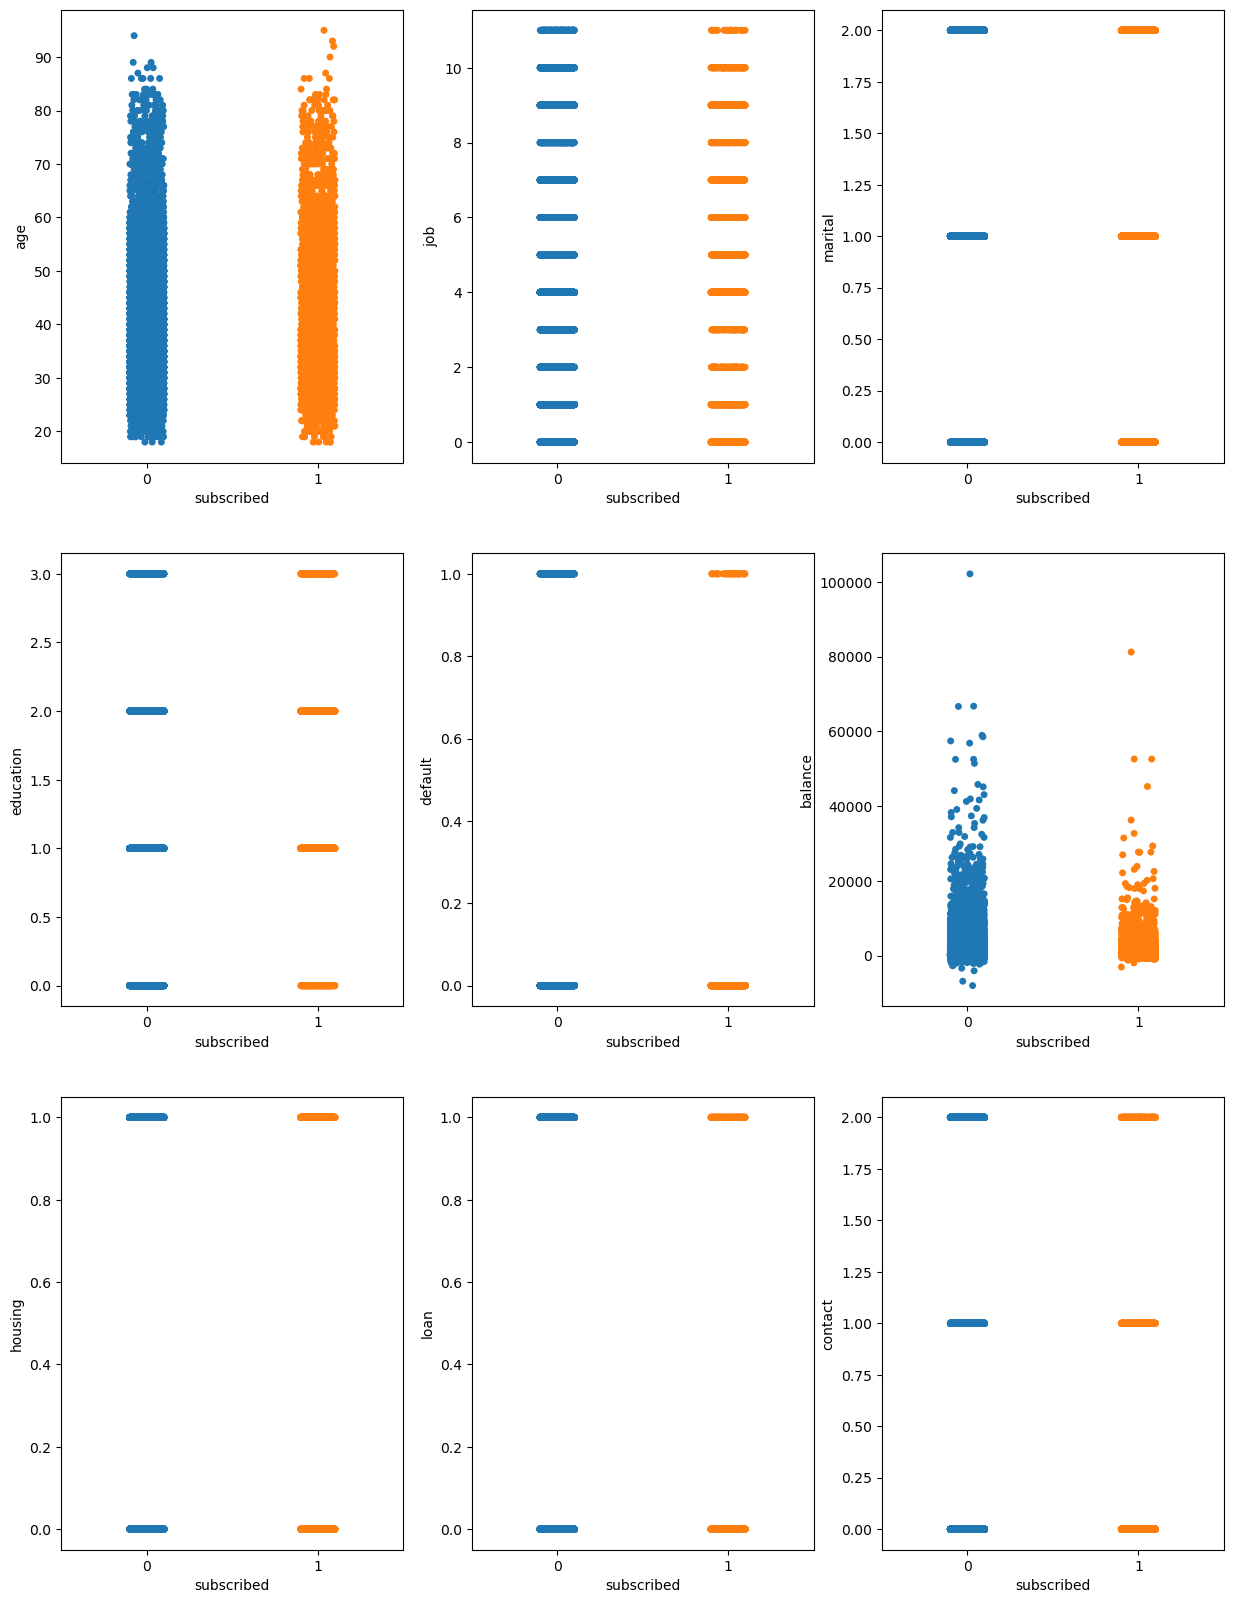

In [38]:
plt.figure(figsize=(15,20))
plotnumber = 1

for column in x:
    if plotnumber<=9:
        ax = plt.subplot (3,3,plotnumber)
        sns.stripplot(y,x[column])

    plotnumber+=1
plt.show()

# 

## Checking Multi-colinearity

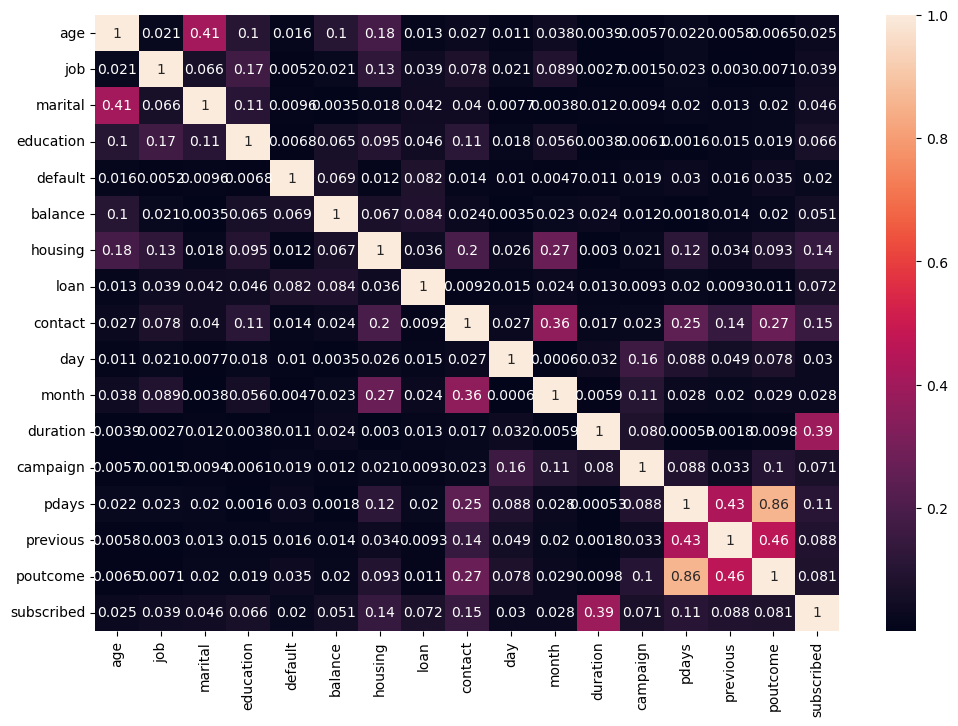

In [39]:
df_corr = df.corr().abs ()

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

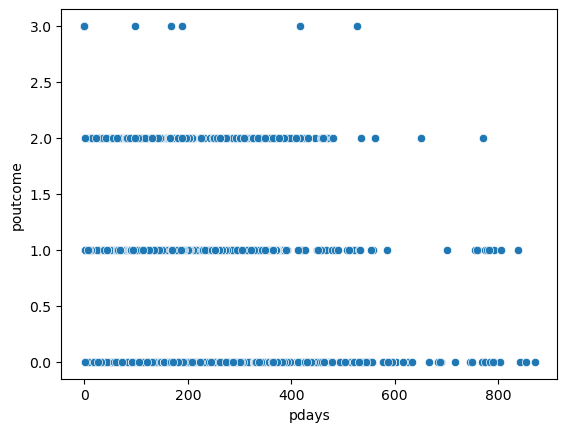

In [40]:
sns.scatterplot(y = 'poutcome', x = 'pdays', data = df)
plt.show()

# 

# 

# 

# 5) Transformation of Data

## Removing Outliners

In [41]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [42]:
from scipy.stats import zscore 

z_score = zscore (df[['age', 'balance']])
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 2).all(axis=1)
df = df[filtering_entry]

df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,29957.000000,29957.000000,29957.000000,29957.000000,29957.000000,29957.000000,29957.000000,29957.000000,29957.000000,29957.000000,29957.000000,29957.000000,29957.000000,29957.000000,29957.000000,29957.000000,29957.000000
mean,40.236940,4.306873,1.172280,1.223020,0.019428,941.714858,0.570885,0.169142,0.652902,15.864272,5.521581,256.538739,2.783723,39.326301,0.560670,2.573088,0.109857
std,9.629857,3.307523,0.609267,0.740295,0.138026,1409.451240,0.494958,0.374884,0.906588,8.358110,2.972440,256.891936,3.126040,99.914893,2.441962,0.978457,0.312717
min,20.000000,0.000000,0.000000,0.000000,0.000000,-4057.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,60.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,406.000000,1.000000,0.000000,0.000000,16.000000,6.000000,179.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1247.000000,1.000000,0.000000,2.000000,21.000000,8.000000,317.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,62.000000,11.000000,2.000000,3.000000,1.000000,7419.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,55.000000,871.000000,275.000000,3.000000,1.000000


In [43]:
df.shape

(29957, 17)

# 

## Feature Selection

### Dropping Columns

In [44]:
df= df.drop(columns = ['poutcome'])

In [45]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0


### 

### 

### 

# 6) Visual Representation Again

## Checking Skewness

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

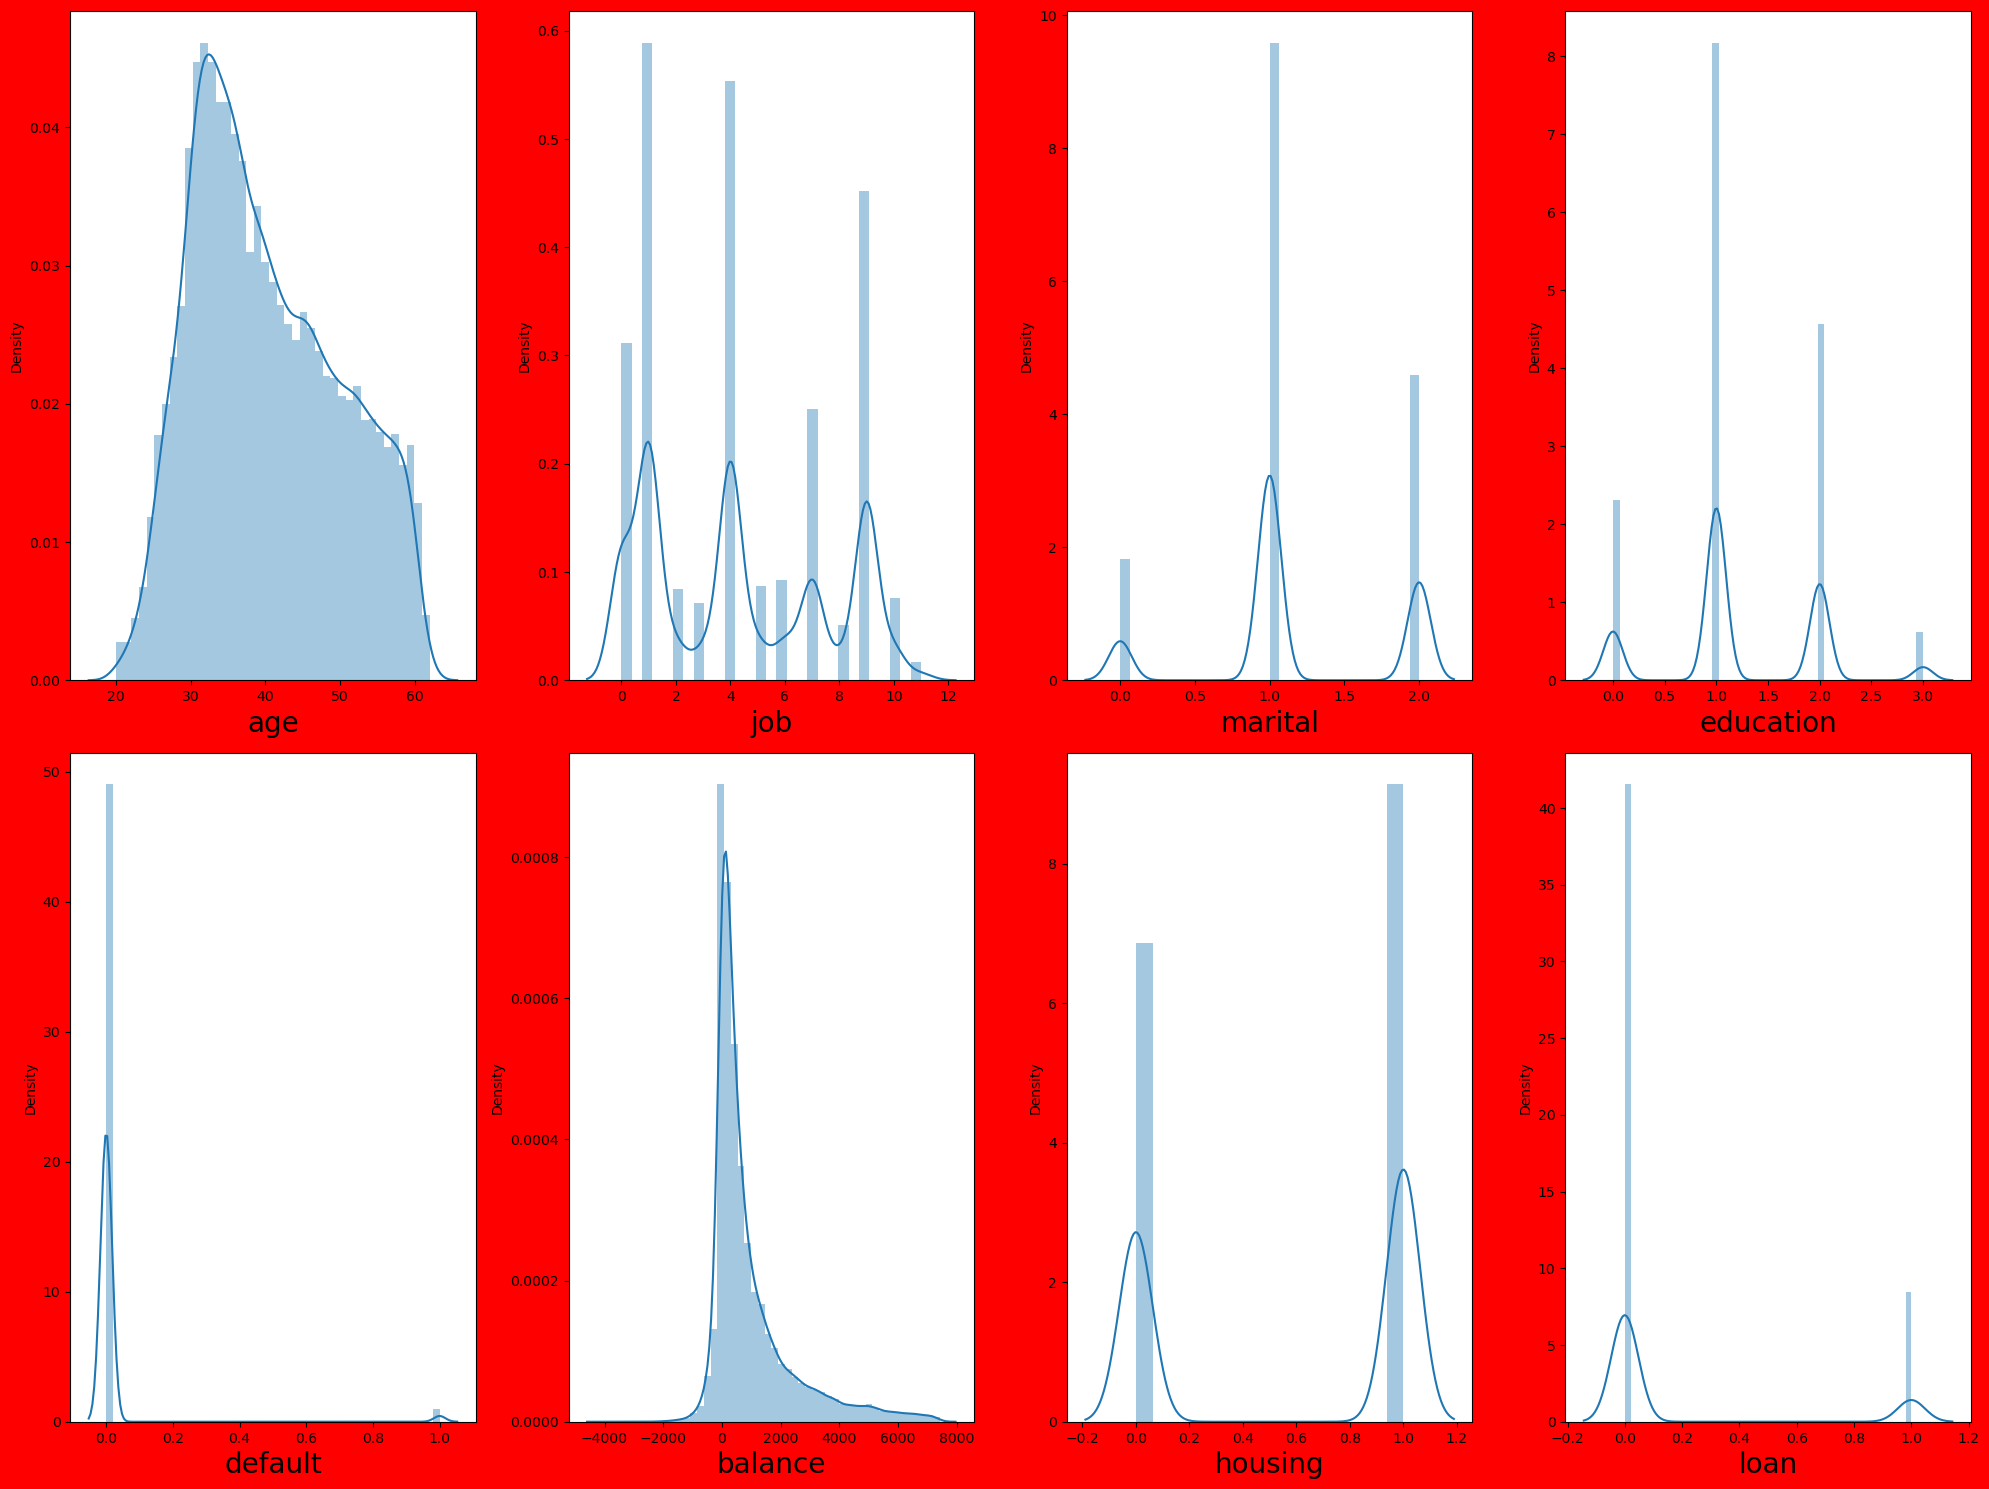

In [47]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in df:                       
    if plotnumber<=8:                    
        ax = plt.subplot(2,4,plotnumber)    
        sns.distplot(df[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

# 

## Checking Outliners

In [48]:
df_features = df.drop('subscribed',axis=1)

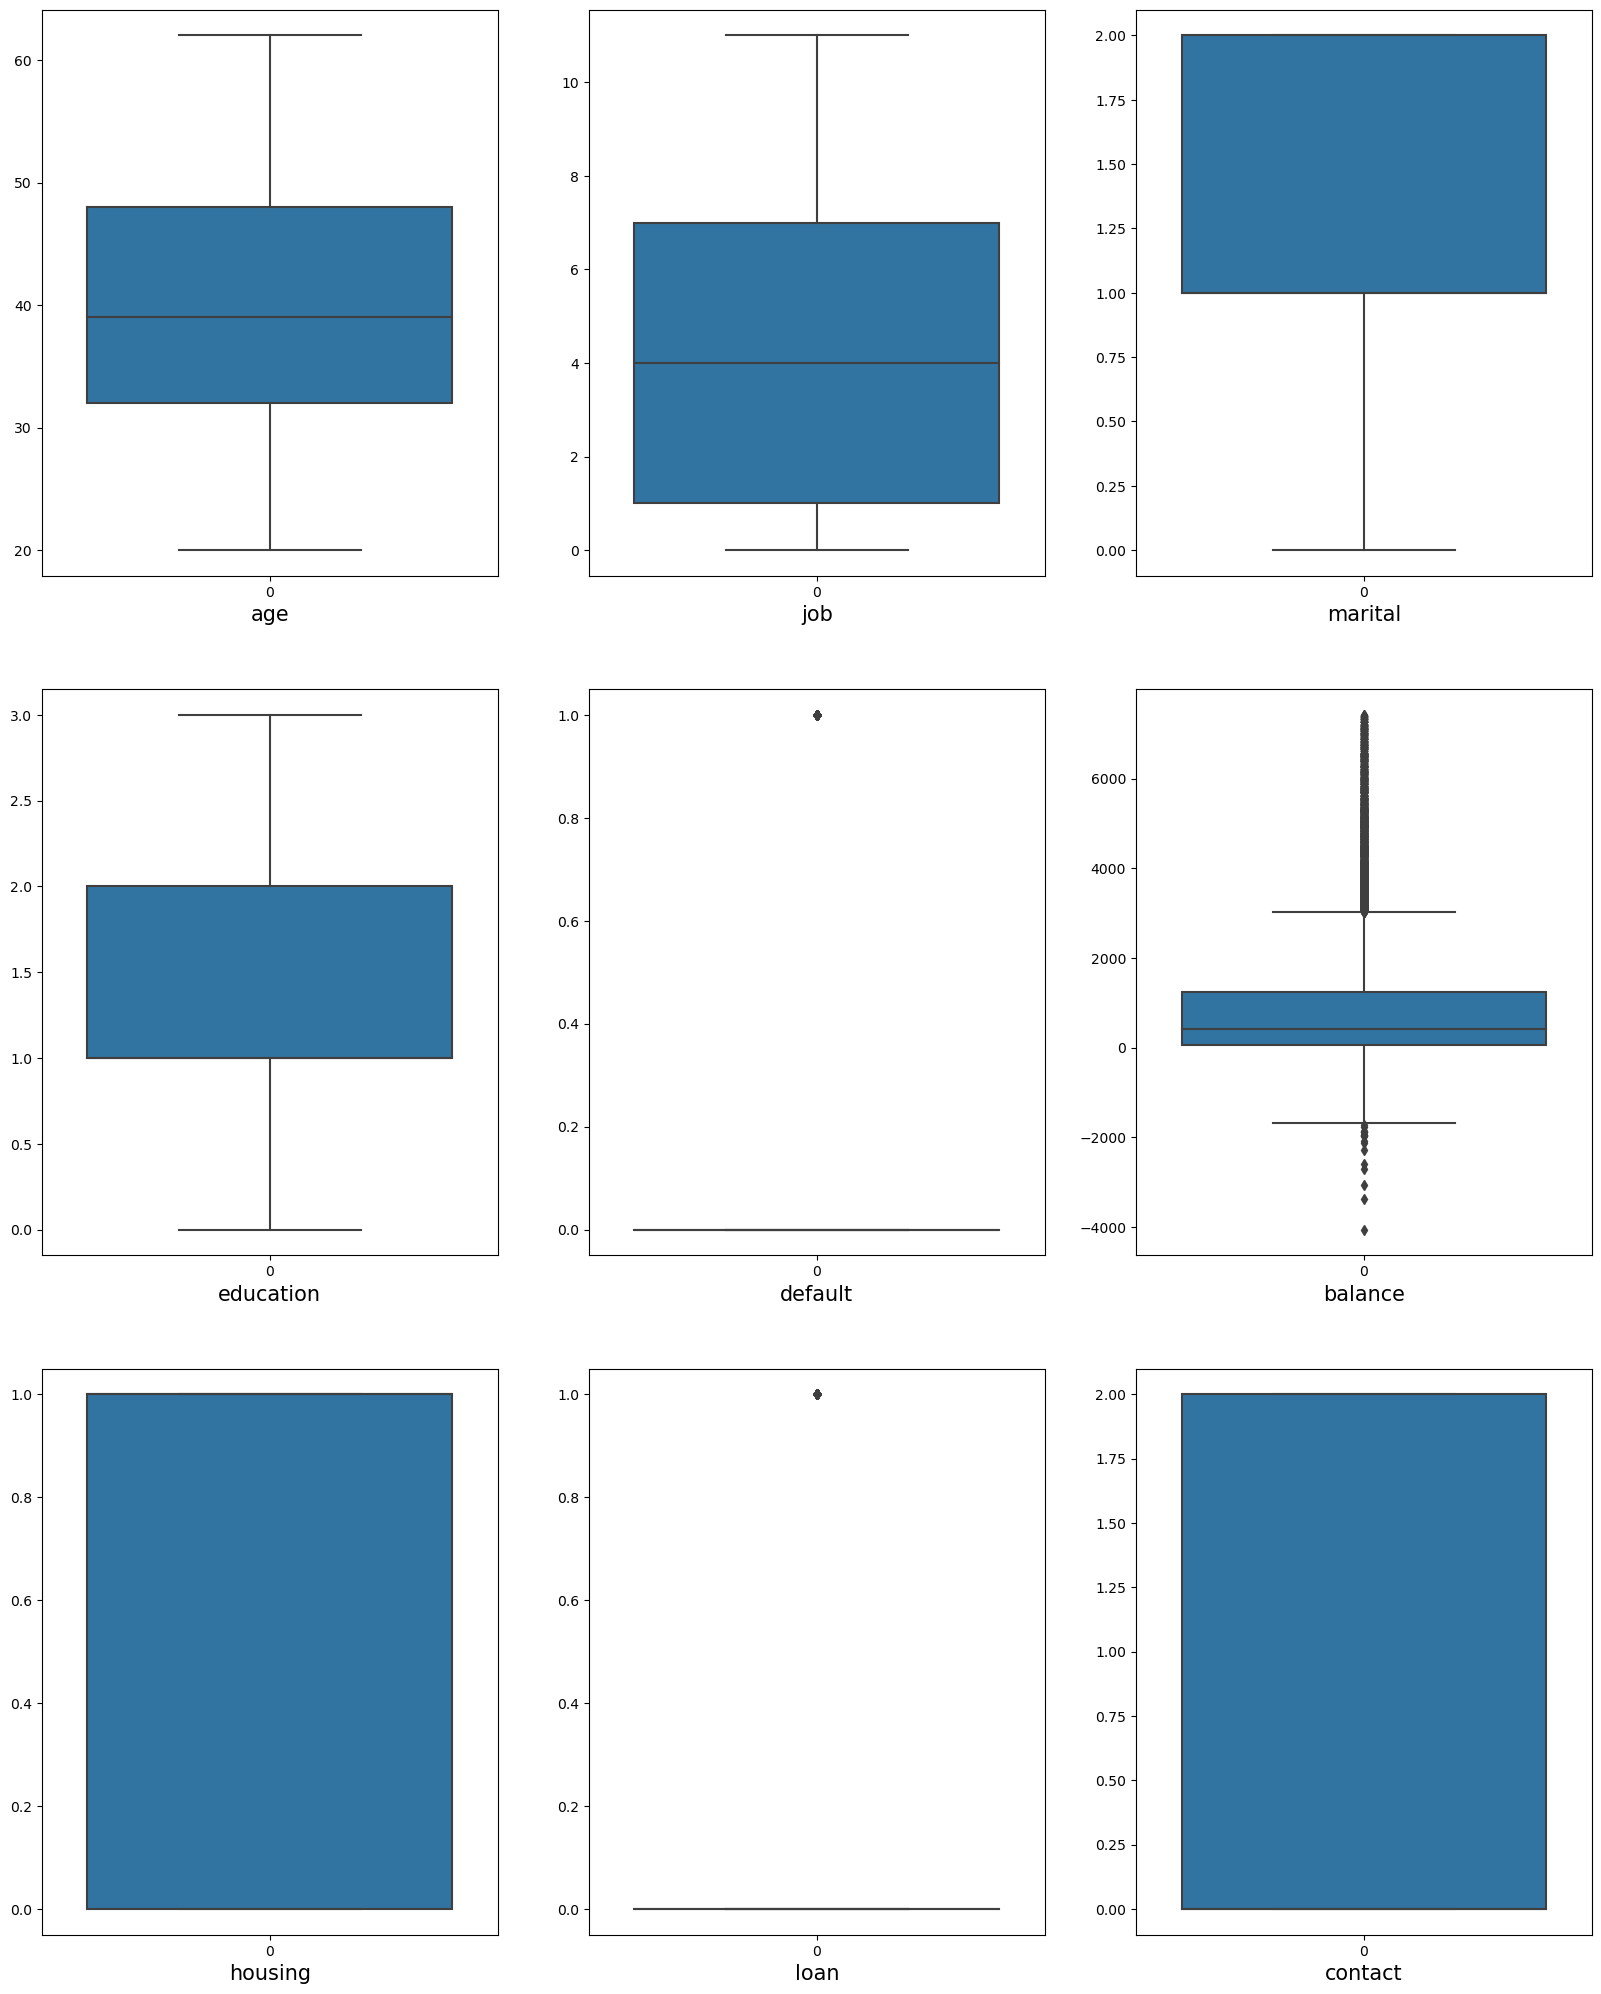

In [49]:
plt.figure(figsize=(20,25))
graph = 1

for column in df_features: 
    if graph<=9:
        plt.subplot(3,3, graph)
        ax=sns.boxplot(data= df_features [column])   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

# 

## Data Distribution

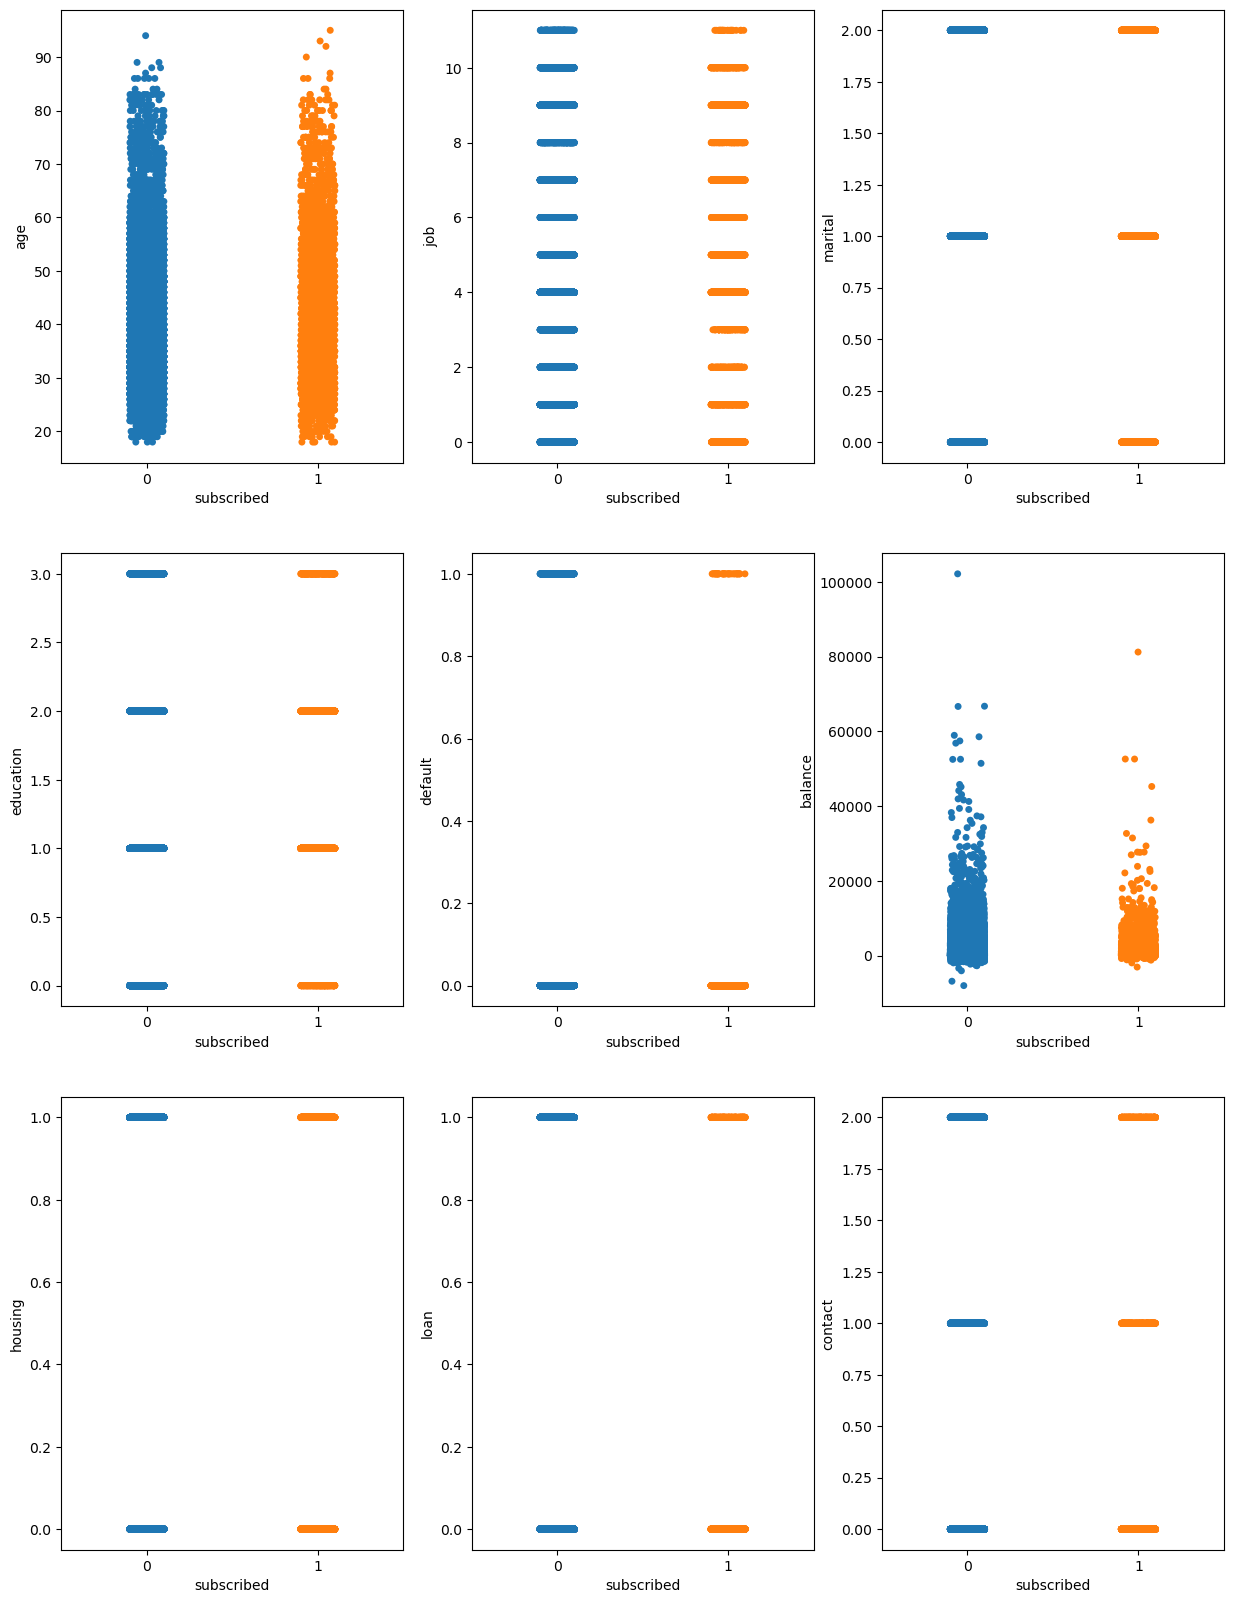

In [50]:
plt.figure(figsize=(15,20))
plotnumber = 1

for column in x:
    if plotnumber<=9:
        ax = plt.subplot (3,3,plotnumber)
        sns.stripplot(y,x[column])

    plotnumber+=1
plt.show()

# 

## Checking Multi-colinearity

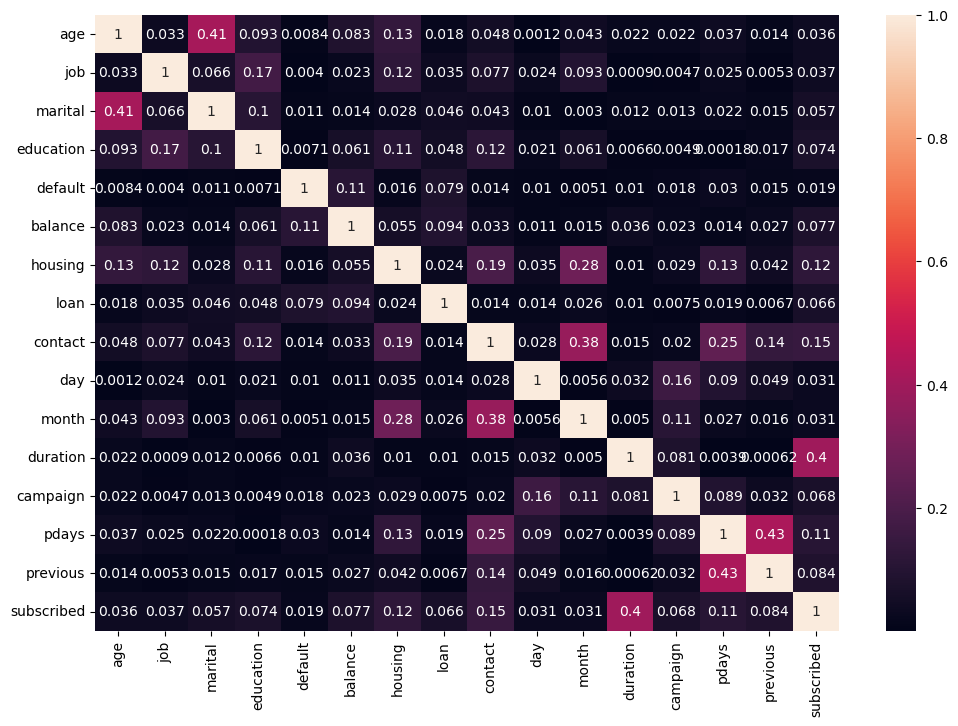

In [51]:
df_corr = df.corr().abs ()

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

### 

### 

### 

# 6) Selection of Models

### Creating Models

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

### Separating Features & Target

In [53]:
x = df.drop(columns=['subscribed'],axis=1)
y_train = df.subscribed
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12


### Importing important Metrices

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

### 

### 

### 

# 7) Standardization 

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x)

### 

### 

# 8) Preparing Test data

In [57]:
df1 = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv")

In [58]:
df1.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [59]:
df1.drop(['ID','poutcome'], axis=1,inplace=True)

In [60]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0


In [61]:
df1.job = le.fit_transform(df1.job)
df1.marital = le.fit_transform(df1.marital)
df1.education = le.fit_transform(df1.education)
df1.default = le.fit_transform(df1.default)
df1.housing = le.fit_transform(df1.housing)
df1.loan = le.fit_transform(df1.loan)
df1.contact = le.fit_transform(df1.contact)
df1.month = le.fit_transform(df1.month)
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0
1,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0
2,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0
13560,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0
13561,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0
13562,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3


In [62]:
x_test = df1

### 

### 

# 9) Training the Model

## Logistic Regression

### Creating Logistic Regression model

In [74]:
cls_reg = LogisticRegression()

In [75]:
cls_reg.fit(x_train, y_train)

LogisticRegression()

In [76]:
cls_reg.coef_

array([[-0.08926493,  0.0171523 ,  0.09502608,  0.15038153, -0.01611989,
         0.14243315, -0.50091353, -0.26337828, -0.55739664, -0.05925814,
         0.09742715,  1.03115086, -0.34540186,  0.2256086 ,  0.15125196]])

In [77]:
cls_reg.intercept_

array([-2.78672997])

In [78]:
print('Accuracy Score:',cls_reg.score(x_train, y_train))

Accuracy Score: 0.8973862536302033


In [79]:
y_pred = cls_reg.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

# 

# 

## DecisionTreeClassifier

### Creating DecisionTreeClassifier model

In [73]:
dc = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(4, 20, 2),
              'min_samples_split': range(0, 10, 2),
              'min_samples_leaf': range(0,5,1),
              'max_features': ['sqrt', 'log2', None]
             }
gridsearch = GridSearchCV(estimator=dc, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'splitter': 'random'}

In [82]:
cls_dec = DecisionTreeClassifier(criterion='gini',min_samples_leaf= 1, min_samples_split=2,max_depth=16)

In [83]:
cls_dec.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=16)

In [84]:
print('Accuracy Score:',cls_dec.score(x_train, y_train))

Accuracy Score: 0.9829755983576459


In [85]:
y_pred = cls_dec.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

# 

# 

## Random Forest Classifier

### Creating Random Forest Classifier model

In [ ]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

In [418]:
cls_rf = RandomForestClassifier(n_estimators=450,criterion='gini',min_samples_split=3,max_depth=16)

In [419]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_split=3, n_estimators=450)

In [420]:
print('Accuracy Score:',cls_rf.score(x_train, y_train))

Accuracy Score: 0.9766331742163769


In [421]:
y_pred = cls_rf.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

# 

# 

## KNeighbors Classifier

### Creating KNeighborsClassifier Model

In [422]:
cls_KN = KNeighborsClassifier(n_neighbors=3, leaf_size=25, p = 1, algorithm='auto', weights = 'distance')

In [423]:
cls_KN.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=3, p=1, weights='distance')

In [424]:
print('Accuracy Score:',cls_KN.score(x_train, y_train))

Accuracy Score: 1.0


In [425]:
y_pred = cls_KN.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

# 

# 

## Support Vector Classifier

### Creating Support Vector Classifier model

In [426]:
cls_SVC = SVC(kernel='rbf',C=500, gamma=20)

In [427]:
cls_SVC.fit(x_train, y_train)

SVC(C=500, gamma=20)

In [428]:
print('Accuracy Score:',cls_SVC.score(x_train, y_train))

Accuracy Score: 1.0


In [429]:
y_pred = cls_SVC.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# 

# 

## Gradient Boosting Classifier

### Creating Gradient Boosting Classifier model

In [430]:
cls_gb = GradientBoostingClassifier(learning_rate=1)

In [431]:
cls_gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1)

In [432]:
print('Accuracy Score:',cls_gb.score(x_train, y_train))

Accuracy Score: 0.9352071302199819


In [433]:
y_pred = cls_gb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# 

# 

## GaussianNB

### Create a GaussianNB model

In [434]:
gnb = GaussianNB()

In [435]:
gnb.fit(x_train, y_train)

GaussianNB()

In [436]:
print('Accuracy Score:',cls_gb.score(x_train, y_train))

Accuracy Score: 0.9352071302199819


In [437]:
y_pred = gnb.predict(x_test)

# 

# 

# 

# 11) Saving the Model

### Saving the Model

In [297]:
import pickle 

In [298]:
with open('model_lr', 'wb') as f: 
    pickle.dump(cls_reg, f)
    
with open('model_dt', 'wb') as f: 
    pickle.dump(cls_dec, f)
    
with open('model_rf', 'wb') as f: 
    pickle.dump(cls_rf, f)
    
with open('model_kn', 'wb') as f: 
    pickle.dump(cls_KN, f)
    
with open('model_svc', 'wb') as f: 
    pickle.dump(cls_SVC, f)
    
with open('model_gb', 'wb') as f: 
    pickle.dump(cls_gb, f)
    
with open('model_gnb', 'wb') as f: 
    pickle.dump(gnb, f)

### Opening the Saved Models

In [299]:
with open('model_lr', 'rb') as f:
    lr = pickle.load(f)

In [300]:
with open('model_dt', 'rb') as f:
    dt = pickle.load(f)

In [301]:
with open('model_rf', 'rb') as f:
    rf = pickle.load(f)

In [302]:
with open('model_kn', 'rb') as f:
    kn = pickle.load(f)

In [303]:
with open('model_svc', 'rb') as f:
    svc = pickle.load(f)

In [304]:
with open('model_gb', 'rb') as f:
    gb = pickle.load(f)

In [305]:
with open('model_gnb', 'rb') as f:
    gnb = pickle.load(f)

### Predicting using Saved models

In [313]:
lr.predict(scaler.transform([[3,1,30,1,0,2]]))

array([0], dtype=int64)

In [314]:
dt.predict(scaler.transform([[3,1,30,1,0,2]]))

array([0], dtype=int64)

In [315]:
rf.predict(scaler.transform([[3,1,30,1,0,2]]))

array([0], dtype=int64)

In [316]:
kn.predict(scaler.transform([[3,1,30,1,0,2]]))

array([0], dtype=int64)

In [317]:
svc.predict(scaler.transform([[3,1,30,1,0,2]]))

array([0], dtype=int64)

In [318]:
gb.predict(scaler.transform([[3,1,30,1,0,2]]))

array([0], dtype=int64)

In [319]:
gnb.predict(scaler.transform([[3,1,30,1,0,2]]))

array([0], dtype=int64)

# 

# 